In [ ]:
# Cell 1: imports + loaders
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_context("talk")
sns.set_style("whitegrid")

base = Path("SVM")

def load_X(name):
    df = pd.read_csv(base / name)
    if df.columns[0].startswith("Unnamed"):
        df = df.drop(columns=df.columns[0])
    return df

def load_y(name):
    df = pd.read_csv(base / name)
    if df.columns[0].startswith("Unnamed"):
        df = df.drop(columns=df.columns[0])
    return df.iloc[:, 0].astype(str)

tcga = {
    "X_train": load_X("X_train.csv"),
    "X_test": load_X("X_test.csv"),
    "y_train": load_y("Y_train.csv"),
    "y_test": load_y("Y_test.csv"),
}

norway = {
    "X_train": load_X("X_train_Norway.csv"),
    "X_test": load_X("X_test_Norway.csv"),
    "y_train": load_y("Y_train_Norway.csv"),
    "y_test": load_y("Y_test_Norway.csv"),
}

# Combine train + test
tcga["X_all"] = pd.concat([tcga["X_train"], tcga["X_test"]], ignore_index=True)
tcga["y_all"] = pd.concat([tcga["y_train"], tcga["y_test"]], ignore_index=True)

norway["X_all"] = pd.concat([norway["X_train"], norway["X_test"]], ignore_index=True)
norway["y_all"] = pd.concat([norway["y_train"], norway["y_test"]], ignore_index=True)



In [10]:
tcga["X_all"]

,RPS4Y2,RPS4Y1,TBL1Y,NLGN4Y,PRKY,PCDH11Y,TTTY20,GABRE,FTHL17,PORCN,...,EP300,DERL3,PLA2G3,TMPRSS6,MIR1281,GGT3P,UBE2L3,APOL5,SLC5A1,CDC42EP1
0,0.5209,0.5105,0.433200,0.037325,0.4363,0.02950,0.426200,0.712500,0.944867,0.357322,...,0.0855,0.32415,0.6185,0.70185,0.0855,0.8338,0.1482,0.9249,0.0395,0.0240
1,0.4888,0.5696,0.390700,0.139125,0.6605,0.06130,0.439000,0.514275,0.836533,0.442667,...,0.0687,0.53555,0.7099,0.78360,0.0687,0.8580,0.3704,0.9177,0.2489,0.0200
2,0.5391,0.5437,0.454925,0.192025,0.5849,0.12625,0.386400,0.481275,0.942800,0.387322,...,0.0601,0.13925,0.4810,0.69015,0.0601,0.8438,0.2285,0.8858,0.2295,0.0201
3,0.4876,0.5256,0.397220,0.061100,0.6684,0.06640,0.514000,0.557475,0.939767,0.308956,...,0.0783,0.09210,0.8306,0.77100,0.0783,0.8193,0.2955,0.8971,0.1358,0.0219
4,0.5115,0.5117,0.288900,0.098150,0.5875,0.20505,0.414300,0.496950,0.923800,0.436256,...,0.0921,0.41530,0.5981,0.77980,0.0921,0.8205,0.3805,0.8396,0.4089,0.0231
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
615,0.5720,0.6549,0.518900,0.035425,0.6502,0.04670,0.491875,0.351000,0.865867,0.230944,...,0.0762,0.06910,0.8565,0.68965,0.0762,0.8161,0.2376,0.9571,0.2436,0.0253
616,0.4561,0.5263,0.394920,0.033800,0.4687,0.11050,0.472300,0.324525,0.802433,0.400011,...,0.0569,0.10080,0.7523,0.33690,0.0569,0.8326,0.2347,0.9172,0.1312,0.0247
617,0.5174,0.5214,0.608300,0.143525,0.8345,0.03610,0.448900,0.264375,0.688300,0.449378,...,0.0971,0.71540,0.8556,0.85775,0.0971,0.8801,0.2417,0.9207,0.9009,0.0208
618,0.5697,0.5696,0.568600,0.075050,0.6390,0.06160,0.389500,0.501250,0.935000,0.428522,...,0.0669,0.39445,0.7768,0.76315,0.0669,0.8447,0.3757,0.9374,0.4792,0.0232


,count,ratio
Label,,
LumA,288,0.465
LumB,127,0.205
Normal,87,0.140
Basal,87,0.140
Her2,31,0.050


,count,ratio
Label,,
LumA,115,0.441
LumB,62,0.238
Her2,37,0.142
Basal,34,0.130
Normal,13,0.050


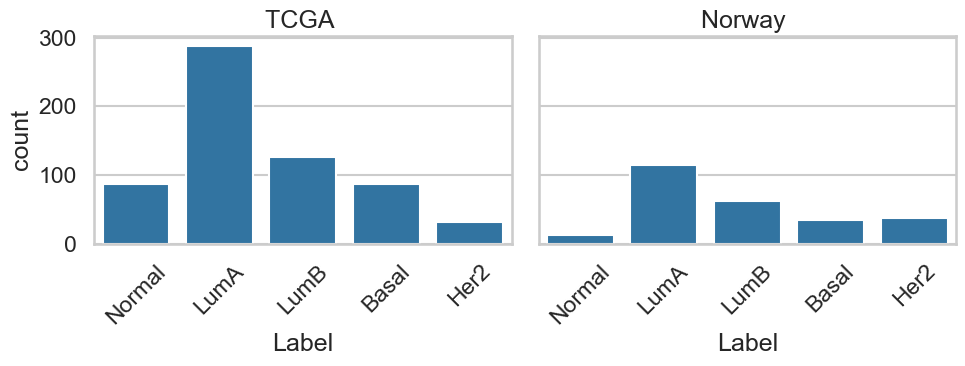

In [2]:
# Cell 2: class balance (combined)
def class_balance(y):
    counts = y.value_counts()
    ratios = (counts / counts.sum()).round(3)
    return pd.DataFrame({"count": counts, "ratio": ratios})

display(class_balance(tcga["y_all"]), class_balance(norway["y_all"]))

order = pd.Index(pd.concat([tcga["y_all"], norway["y_all"]]).unique()).tolist()

fig, axes = plt.subplots(1, 2, figsize=(10, 4), sharey=True)
sns.countplot(x=tcga["y_all"], order=order, ax=axes[0])
axes[0].set_title("TCGA ")
sns.countplot(x=norway["y_all"], order=order, ax=axes[1])
axes[1].set_title("Norway ")

for ax in axes.ravel():
    ax.tick_params(axis="x", rotation=45)
plt.tight_layout()


mean    0.325267
std     0.297628
min     0.007200
max     0.994000
p1      0.017250
p5      0.026257
p25     0.056850
p50     0.215900
p75     0.557317
p95     0.893600
p99     0.942800
dtype: float64

mean    0.331032
std     0.278999
min     0.022042
max     0.978451
p1      0.050547
p5      0.059304
p25     0.082267
p50     0.200958
p75     0.578663
p95     0.834486
p99     0.887159
dtype: float64

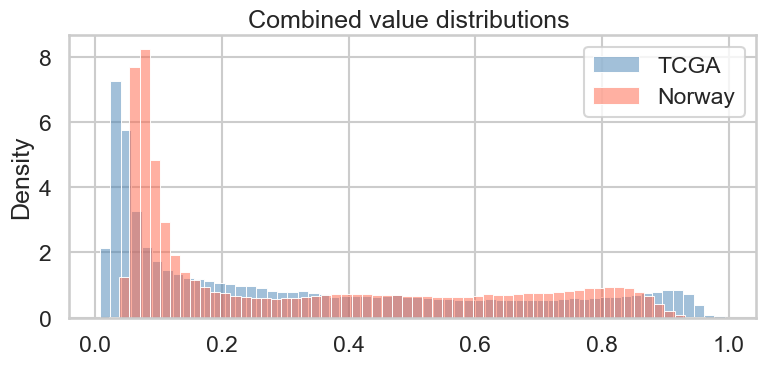

In [3]:
# Cell 3: value distribution summary + histograms
def sample_values(X, n=200_000, seed=0):
    rng = np.random.default_rng(seed)
    flat = X.to_numpy().ravel()
    if flat.size <= n:
        return flat
    idx = rng.integers(0, flat.size, size=n)
    return flat[idx]

def value_summary(values):
    q = np.percentile(values, [1, 5, 25, 50, 75, 95, 99])
    return pd.Series({
        "mean": values.mean(),
        "std": values.std(ddof=0),
        "min": values.min(),
        "max": values.max(),
        "p1": q[0], "p5": q[1], "p25": q[2], "p50": q[3],
        "p75": q[4], "p95": q[5], "p99": q[6],
    })

vals_tcga = sample_values(tcga["X_all"])
vals_nor = sample_values(norway["X_all"])

display(value_summary(vals_tcga), value_summary(vals_nor))

fig, ax = plt.subplots(figsize=(8, 4))
sns.histplot(vals_tcga, bins=60, color="steelblue", alpha=0.5, stat="density", ax=ax, label="TCGA")
sns.histplot(vals_nor, bins=60, color="tomato", alpha=0.5, stat="density", ax=ax, label="Norway")
ax.set_title("Combined value distributions ")
ax.legend()
plt.tight_layout()


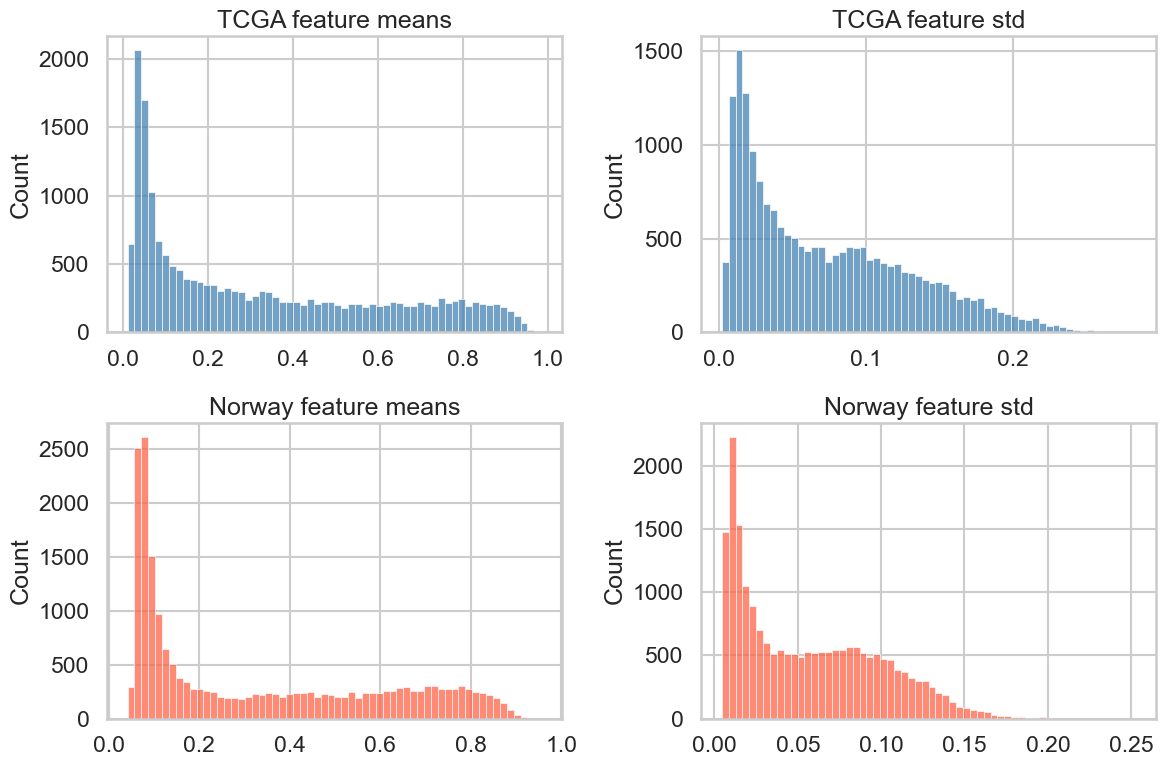

In [4]:
# Cell 4: per-feature mean/std distributions
def feature_stats(X):
    mean = X.mean(axis=0)
    std = X.std(axis=0, ddof=0)
    return mean, std

mean_tcga, std_tcga = feature_stats(tcga["X_all"])
mean_nor, std_nor = feature_stats(norway["X_all"])

fig, axes = plt.subplots(2, 2, figsize=(12, 8))
sns.histplot(mean_tcga, bins=60, color="steelblue", ax=axes[0, 0])
axes[0, 0].set_title("TCGA feature means")
sns.histplot(std_tcga, bins=60, color="steelblue", ax=axes[0, 1])
axes[0, 1].set_title("TCGA feature std")

sns.histplot(mean_nor, bins=60, color="tomato", ax=axes[1, 0])
axes[1, 0].set_title("Norway feature means")
sns.histplot(std_nor, bins=60, color="tomato", ax=axes[1, 1])
axes[1, 1].set_title("Norway feature std")

plt.tight_layout()


median         8.834747
p75           22.791229
p90           44.933115
p95           62.866456
frac_gt_10     0.469627
dtype: float64

median         3.398538
p75            6.274729
p90           11.333706
p95           16.212239
frac_gt_10     0.124826
dtype: float64

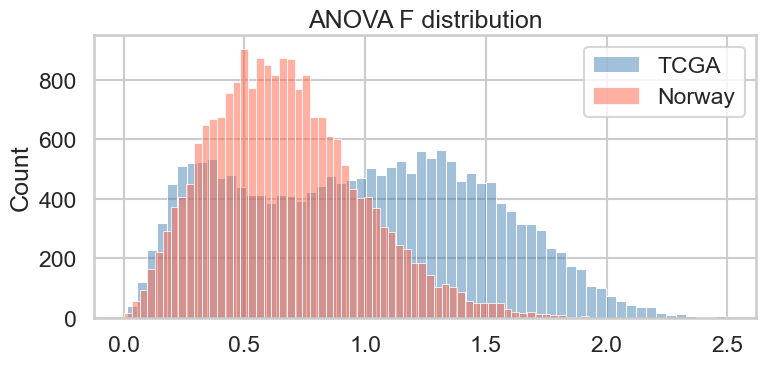

In [5]:
# Cell 5: ANOVA F distribution (class separability)
def anova_fallback(X, y):
    Xv = X.to_numpy()
    yv = pd.Categorical(y).codes
    classes = np.unique(yv)
    overall = Xv.mean(axis=0)
    ssb = np.zeros(Xv.shape[1], dtype=np.float64)
    ssw = np.zeros(Xv.shape[1], dtype=np.float64)

    for c in classes:
        Xc = Xv[yv == c]
        n = Xc.shape[0]
        if n == 0:
            continue
        mean_c = Xc.mean(axis=0)
        var_c = Xc.var(axis=0, ddof=0)
        ssb += n * (mean_c - overall) ** 2
        ssw += n * var_c

    dfb = len(classes) - 1
    dfw = Xv.shape[0] - len(classes)
    f = (ssb / dfb) / (ssw / dfw)
    f[~np.isfinite(f)] = np.nan
    return f

try:
    from sklearn.feature_selection import f_classif
    def anova_f(X, y):
        f, _ = f_classif(X, y)
        return f
except Exception:
    anova_f = anova_fallback

def f_summary(f):
    f = f[np.isfinite(f)]
    return pd.Series({
        "median": np.median(f),
        "p75": np.percentile(f, 75),
        "p90": np.percentile(f, 90),
        "p95": np.percentile(f, 95),
        "frac_gt_10": (f > 10).mean(),
    })

f_tcga = anova_f(tcga["X_all"], tcga["y_all"])
f_nor = anova_f(norway["X_all"], norway["y_all"])

display(f_summary(f_tcga), f_summary(f_nor))

fig, ax = plt.subplots(figsize=(8, 4))
sns.histplot(np.log10(f_tcga + 1), bins=60, color="steelblue", alpha=0.5, ax=ax, label="TCGA")
sns.histplot(np.log10(f_nor + 1), bins=60, color="tomato", alpha=0.5, ax=ax, label="Norway")
ax.set_title("ANOVA F distribution")
ax.legend()
plt.tight_layout()


Mean diff quantiles:
0.50    0.045489
0.90    0.163746
0.99    0.405955
dtype: float64
Std ratio quantiles (TCGA / Norway):
0.1    0.696596
0.5    1.345320
0.9    2.480506
dtype: float64


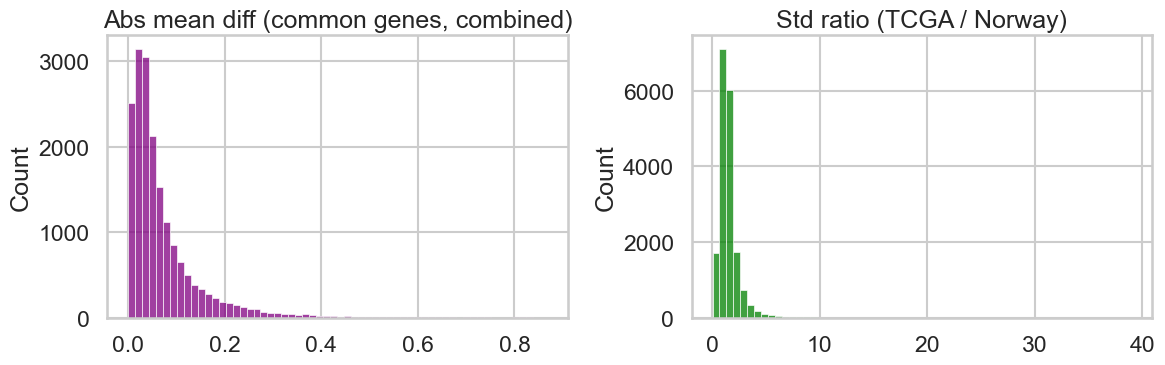

In [6]:
# Cell 6: cross-dataset feature shift (common genes)
common = tcga["X_all"].columns.intersection(norway["X_all"].columns)
tcga_c = tcga["X_all"][common]
nor_c = norway["X_all"][common]

mean_diff = (tcga_c.mean() - nor_c.mean()).abs()
std_ratio = tcga_c.std(ddof=0) / nor_c.std(ddof=0)
std_ratio = std_ratio.replace([np.inf, -np.inf], np.nan).dropna()

print("Mean diff quantiles:")
print(mean_diff.quantile([0.5, 0.9, 0.99]))
print("Std ratio quantiles (TCGA / Norway):")
print(std_ratio.quantile([0.1, 0.5, 0.9]))

fig, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.histplot(mean_diff, bins=60, color="purple", ax=axes[0])
axes[0].set_title("Abs mean diff (common genes, combined)")
sns.histplot(std_ratio, bins=60, color="green", ax=axes[1])
axes[1].set_title("Std ratio (TCGA / Norway)")
plt.tight_layout()


In [7]:
pip install umap-learn

Note: you may need to restart the kernel to use updated packages.


PCA silhouette: TCGA -0.048 Norway -0.022
In dataset TCGA, subtypes form overlapping manifolds, limiting achievable classification accuracy.
In dataset Norway, subtypes form overlapping manifolds, limiting achievable classification accuracy.


c:\Users\Public\Anaconda\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
c:\Users\Public\Anaconda\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


UMAP silhouette: TCGA 0.03 Norway -0.045
In dataset TCGA, subtypes form overlapping manifolds, limiting achievable classification accuracy.
In dataset Norway, subtypes form overlapping manifolds, limiting achievable classification accuracy.


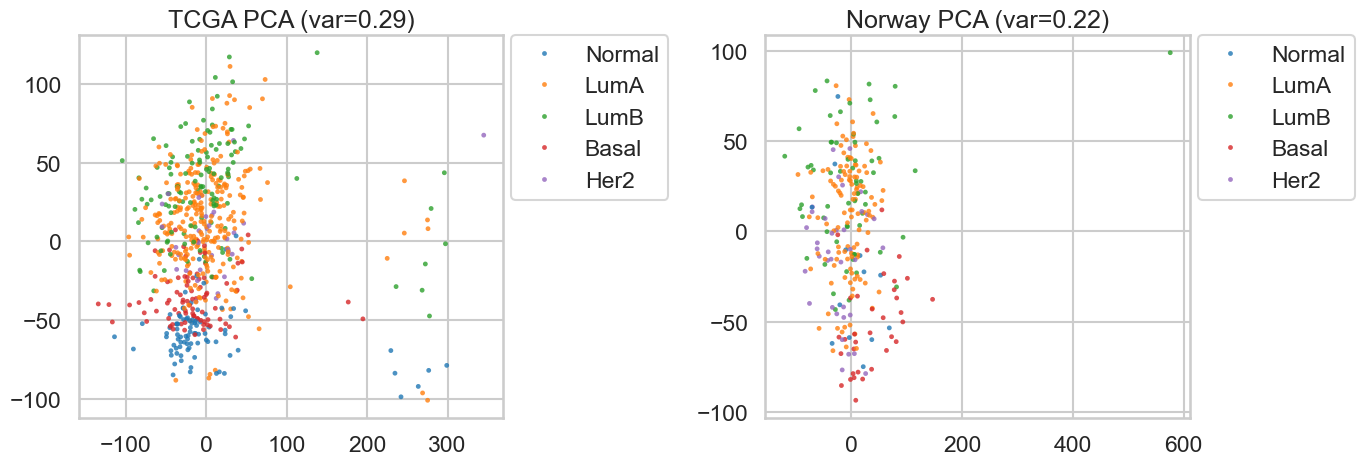

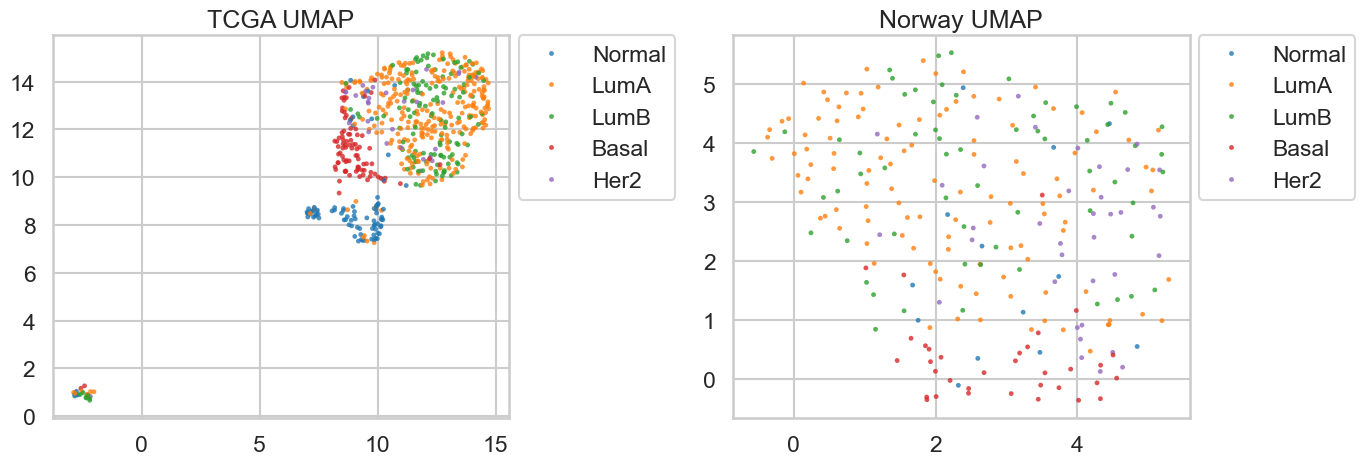

In [19]:
# --- One-cell: PCA + UMAP for both datasets, with step-by-step comments ---

# 0) Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

# 1) Helper: prepare the matrix for PCA/UMAP
def _prep(X, scale=True):
    # Convert DataFrame (samples x features) -> numpy array
    Xv = X.to_numpy()

    # Standardize each feature (gene) so mean=0, std=1
    if scale:
        Xv = StandardScaler().fit_transform(Xv)

    return Xv

# 2) PCA embedding (2D)
def pca_embed(X, scale=True, random_state=0):
    Xv = _prep(X, scale=scale)
    pca = PCA(n_components=2, random_state=random_state)
    Z = pca.fit_transform(Xv)  # 2D coordinates for each sample
    var = pca.explained_variance_ratio_.sum()  # variance captured by PC1+PC2
    return Z, var

# 3) UMAP embedding (2D)
def umap_embed(X, scale=True, random_state=0, n_neighbors=30, min_dist=0.3):
    # Try to import UMAP
    try:
        import umap
    except Exception:
        print("UMAP not available (pip install umap-learn).")
        return None, None

    Xv = _prep(X, scale=scale)

    # Optional PCA pre-reduction for speed/denoising if features > 50
    if Xv.shape[1] > 50:
        Xv = PCA(n_components=50, random_state=random_state).fit_transform(Xv)

    # Build UMAP reducer
    reducer = umap.UMAP(
        n_components=2,
        random_state=random_state,
        n_neighbors=n_neighbors,
        min_dist=min_dist,
    )

    # Fit + transform -> 2D embedding
    Z = reducer.fit_transform(Xv)
    return Z, reducer

# 4) Plot helper
def plot_embed(Z, y, ax, title, order=None):
    df = pd.DataFrame({"x": Z[:, 0], "y": Z[:, 1], "Subtype": y.astype(str)})
    if order is None:
        order = sorted(df["Subtype"].unique())

    sns.scatterplot(
        data=df, x="x", y="y", hue="Subtype",
        hue_order=order, ax=ax, s=12, linewidth=0, alpha=0.8
    )

    ax.set_title(title)
    ax.set_xlabel("")
    ax.set_ylabel("")
    ax.legend(bbox_to_anchor=(1.02, 1), loc="upper left", borderaxespad=0)

# 5) Separation score (silhouette)
def sep_score(Z, y):
    yv = pd.Categorical(y).codes
    if len(np.unique(yv)) < 2:
        return np.nan
    return silhouette_score(Z, yv, metric="euclidean")

# 6) Interpret silhouette score
def interpret_sep(score, name):
    if np.isnan(score):
        return f"{name}: silhouette undefined (need >=2 subtypes)."
    if score < 0.2:
        return f"In dataset {name}, subtypes form overlapping manifolds, limiting achievable classification accuracy."
    if score < 0.4:
        return f"In dataset {name}, subtypes show partial separation with noticeable overlap."
    return f"In dataset {name}, subtypes are fairly well separated in the embedding."

# 7) Fix a consistent color order across TCGA + Norway
order = pd.Index(pd.concat([tcga["y_all"], norway["y_all"]]).unique()).tolist()

# ----------------------------
# PCA for BOTH datasets
# ----------------------------
Z_tcga_pca, var_tcga = pca_embed(tcga["X_all"])
Z_nor_pca, var_nor = pca_embed(norway["X_all"])

fig, axes = plt.subplots(1, 2, figsize=(14, 5))
plot_embed(Z_tcga_pca, tcga["y_all"], axes[0], f"TCGA PCA (var={var_tcga:.2f})", order=order)
plot_embed(Z_nor_pca, norway["y_all"], axes[1], f"Norway PCA (var={var_nor:.2f})", order=order)
plt.tight_layout()

print("PCA silhouette:",
      "TCGA", round(sep_score(Z_tcga_pca, tcga["y_all"]), 3),
      "Norway", round(sep_score(Z_nor_pca, norway["y_all"]), 3))
print(interpret_sep(sep_score(Z_tcga_pca, tcga["y_all"]), "TCGA"))
print(interpret_sep(sep_score(Z_nor_pca, norway["y_all"]), "Norway"))

# ----------------------------
# UMAP for BOTH datasets
# ----------------------------
Z_tcga_umap, _ = umap_embed(tcga["X_all"])
Z_nor_umap, _ = umap_embed(norway["X_all"])

if Z_tcga_umap is not None and Z_nor_umap is not None:
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    plot_embed(Z_tcga_umap, tcga["y_all"], axes[0], "TCGA UMAP", order=order)
    plot_embed(Z_nor_umap, norway["y_all"], axes[1], "Norway UMAP", order=order)
    plt.tight_layout()

    print("UMAP silhouette:",
          "TCGA", round(sep_score(Z_tcga_umap, tcga["y_all"]), 3),
          "Norway", round(sep_score(Z_nor_umap, norway["y_all"]), 3))
    print(interpret_sep(sep_score(Z_tcga_umap, tcga["y_all"]), "TCGA"))
    print(interpret_sep(sep_score(Z_nor_umap, norway["y_all"]), "Norway"))


c:\Users\Public\Anaconda\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


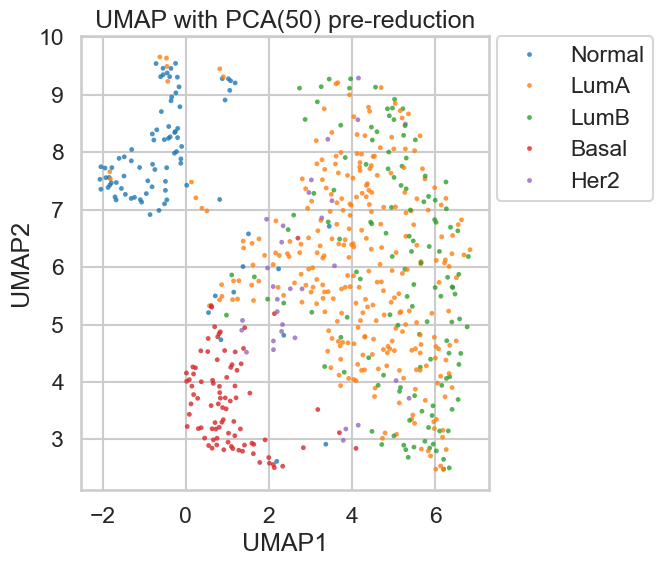

In [22]:
# UMAP with PCA pre-reduction (recommended for 19k+ features)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Choose dataset
dataset = tcga  # or norway

# --- 1) Prepare the input matrix (samples x genes) ---
X = dataset["X_all"]               # DataFrame: rows = samples, columns = genes
y = dataset["y_all"].astype(str)   # subtype labels for coloring

# Scale genes so each has mean=0, std=1
Xv = X

# --- 2) PCA pre-reduction to denoise and speed up UMAP ---
# Keep 50 principal components (captures most structure, reduces noise)
X50 = PCA(n_components=50, random_state=0).fit_transform(Xv)

# --- 3) Run UMAP on PCA-reduced data ---
try:
    import umap.umap_ as umap
except Exception:
    import umap

reducer = umap.UMAP(
    n_components=2,
    n_neighbors=30,   # neighborhood size
    min_dist=0.3,     # how tight clusters can get
    random_state=0
)

Z = reducer.fit_transform(X50)  # shape: (n_samples, 2)

# --- 4) Plot the embedding ---
order = pd.Index(y).unique().tolist()

plt.figure(figsize=(7, 6))
sns.scatterplot(x=Z[:, 0], y=Z[:, 1], hue=y, hue_order=order,
                s=12, alpha=0.8, linewidth=0)
plt.title("UMAP with PCA(50) pre-reduction")
plt.xlabel("UMAP1")
plt.ylabel("UMAP2")
plt.legend(bbox_to_anchor=(1.02, 1), loc="upper left", borderaxespad=0)
plt.tight_layout()
